## - Developing a Text Classifier -
* Describe the different types of ML algorithms
* Differential between unsupervised and supervised learning methodologies
* Describe various sampling and techniques
* Develop end-to-end text classifiers
* Evaluate models using metrics such as accuracy score, precision, and recall
* Build pipelines for steamlining NLP projects
* Save and load models

Hierarchical Clustering
* This exercise we will create 4 clusters from text doucments of sklearn's fetch_20newsgroup dataset. Once clusters are created, we will compare them with their actual categories.

In [3]:
# import all necessary libraries
from sklearn.datasets import fetch_20newsgroups
from scipy.cluster.hierarchy import ward, dendrogram, fcluster
from sklearn.metrics.pairwise import cosine_similarity 
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import re
import string
from collections import Counter
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from pylab import *
import warnings
# warning.filterwarnings('ignore')


In [5]:
# Download a list of stop words and the Wordnet corpus from nltk
nltk.download('stopwords')
stop_words=stopwords.words("english")
stop_words=stop_words+list(string.printable)
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Raymond\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Raymond\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
lemmat=WordNetLemmatizer()

We'll specify the categories of news articles we want to fetch by.

In [8]:
categ=['misc.forsale','sci.electronics','talk.religion.misc']
fetch_data=fetch_20newsgroups(subset='train', categories=categ, shuffle=True, random_state=42, download_if_missing=True)
fetch_data['data'][:5]

['From: Steve@Busop.cit.wayne.edu (Steve Teolis)\nSubject: Re: *** TurboGrafx System For SALE ***\nOrganization: Wayne State University\nLines: 38\nDistribution: na\nNNTP-Posting-Host: 141.217.75.24\n\n>TurboGrafx-16 Base Unit (works like new) with:\n>       1 Controller\n>       AC Adapter\n>       Antenna hookup\n>     * Games:\n>         Kieth Courage\n>         Victory Run\n>         Fantasy Zone\n>         Military Madness\n>         Battle Royal\n>         Legendary Axe\n>         Blazing Lasers\n>         Bloody Wolf\n>\n>  --------------------------------------\n>* Will sell games separatley at $25 each\n>  --------------------------------------\n\nYour kidding, $210.00, man o man, you can buy the system new for $49.00 at \nElectronic Boutique and those games are only about $15 - $20.00 brand new.  \nMaybe you should think about that price again if you REALLY need the money.\n\n\n\n\n\n\n                        \n                        \n                        -=-=-=-=-=-=-=-

In [11]:
fetch_data.target

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

0 refer to as 'misc.forsale', 1 refer to as 'sci.electronics', 2 refer as 'talk.religion.misc'

In [13]:
fetch_data.target_names

['misc.forsale', 'sci.electronics', 'talk.religion.misc']

To convert into pandas dataframe

In [15]:
news_df=pd.DataFrame({'Text':fetch_data['data'], 'Category': fetch_data.target})
news_df.head()

,Text,Category
0,From: Steve@Busop.cit.wayne.edu (Steve Teolis)...,0
1,From: jks2x@holmes.acc.Virginia.EDU (Jason K. ...,0
2,From: wayne@uva386.schools.virginia.edu (Tony ...,1
3,From: lihan@ccwf.cc.utexas.edu (Bruce G. Bostw...,1
4,From: myoakam@cis.ohio-state.edu (micah r yoak...,0


In [16]:
news_df['Category'].value_counts()

1    591
0    585
2    377
Name: Category, dtype: int64

Next step will use a lambda function to extract tokens, lemmatize and remove stop words and concat them

In [17]:
news_df['clean_text']=news_df['Text'].apply(lambda x: ' '.join(lemmat.lemmatize(word.lower())\
                                                              for word in word_tokenize(re.sub(r'([^\s\w]|_)+', ' ',str(x))) \
                                                              if word.lower() not in stop_words))

In [18]:
news_df.head()

,Text,Category,clean_text
0,From: Steve@Busop.cit.wayne.edu (Steve Teolis)...,0,steve busop cit wayne edu steve teolis subject...
1,From: jks2x@holmes.acc.Virginia.EDU (Jason K. ...,0,jks2x holmes acc virginia edu jason schechner ...
2,From: wayne@uva386.schools.virginia.edu (Tony ...,1,wayne uva386 school virginia edu tony wayne su...
3,From: lihan@ccwf.cc.utexas.edu (Bruce G. Bostw...,1,lihan ccwf cc utexas edu bruce bostwick subjec...
4,From: myoakam@cis.ohio-state.edu (micah r yoak...,0,myoakam ci ohio state edu micah yoakam subject...


Create a tf-idf matrix and transform it to a dataframe



In [22]:
tfidf_model=TfidfVectorizer(max_features=200)
tfidf_df=pd.DataFrame(tfidf_model.fit_transform(news_df['clean_text']).todense())
tfidf_df.columns=sorted(tfidf_model.vocabulary_)
tfidf_df.head()

,00,10,100,12,14,15,16,20,25,30,...,well,wire,wiring,without,word,work,world,would,writes,year
0,0.435655,0.0,0.000000,0.0,0.000000,0.127775,0.136811,0.127551,0.133311,0.0,...,0.0,0.0,0.0,0.0,0.0,0.113042,0.000000,0.000000,0.000000,0.0
1,0.000000,0.0,0.000000,0.0,0.000000,0.294937,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
2,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
3,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.142267,0.106317,0.100306,0.0
4,0.000000,0.0,0.207003,0.0,0.191897,0.182138,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0


This step will create a distance matrix by substract the cosine similarities of tf-idf representation of document from 1. The ward function used to create linkagematrix, used in hierarchical clustering

In [23]:
dist=1-cosine_similarity(tfidf_df)
linkage_matrix=ward(dist)

This step will truncate the dendrogram to keep last four clusters. The leaves of a dendrogram refer to the dividual instances that are data points

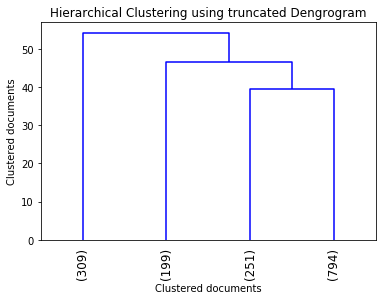

In [29]:
plt.title("Hierarchical Clustering using truncated Dengrogram")
plt.xlabel("Clustered documents")
plt.ylabel("Clustered documents")
dendrogram(linkage_matrix, truncate_mode='lastp',
          p=4, leaf_rotation=90, leaf_font_size=12)
plt.show()

A fcluster() function to obtain cluster labels of clusters obtained by hierarchical clustering

In [30]:
k=4
clusters=fcluster(linkage_matrix,k, criterion='maxclust')
clusters

array([3, 3, 3, ..., 4, 4, 1], dtype=int32)

Finally we'll use of crosstab func of pandas to compare the clusters we have early with actual categories of news articles

In [40]:
news_df['obtained_clusters']=clusters
pd.crosstab(news_df['Category'].replace({0:'misc.forsale', 1:'sci.electronics', 2:'talk.religion.misc'}),\
           news_df['obtained_clusters'].replace({1:'cluster1',2:'cluster2',3:'cluster3'}))

obtained_clusters,4,cluster1,cluster2,cluster3
Category,,,,
misc.forsale,200,155,0,230
sci.electronics,461,110,1,19
talk.religion.misc,133,44,198,2


## k-Means Clustering

In [34]:
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

C:\Users\Raymond\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\Raymond\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [36]:
# create 4 clusters
kmeans=KMeans(n_clusters=4)
kmeans.fit(tfidf_df)
y_kmeans=kmeans.predict(tfidf_df)
news_df['kmeans_cluster']=y_kmeans


In [38]:
news_df.head()

,Text,Category,clean_text,obtained_clusters,kmeans_cluster
0,From: Steve@Busop.cit.wayne.edu (Steve Teolis)...,0,steve busop cit wayne edu steve teolis subject...,3,3
1,From: jks2x@holmes.acc.Virginia.EDU (Jason K. ...,0,jks2x holmes acc virginia edu jason schechner ...,3,3
2,From: wayne@uva386.schools.virginia.edu (Tony ...,1,wayne uva386 school virginia edu tony wayne su...,3,2
3,From: lihan@ccwf.cc.utexas.edu (Bruce G. Bostw...,1,lihan ccwf cc utexas edu bruce bostwick subjec...,1,2
4,From: myoakam@cis.ohio-state.edu (micah r yoak...,0,myoakam ci ohio state edu micah yoakam subject...,1,3


In [39]:
pd.crosstab(news_df['Category'].replace({0:'misc.forsale', 1:'sci.electronics', 2:'talk.religion.misc'}),\
           news_df['kmeans_cluster'].replace({0:'cluster1',1:'cluster2',2:'cluster3',4:'cluster4'}))

kmeans_cluster,3,cluster1,cluster2,cluster3
Category,,,,
misc.forsale,348,94,1,142
sci.electronics,8,429,0,154
talk.religion.misc,0,76,225,76


Finally, to obtain the optimal value of k, that is, the number of clusters, we execute thek-means alogorithm for values of k ranging from 1-6. For each  value of k, will be stored distortion, that is , the mean of distances of documents from their  nearest cluster center. We look for the value of k where the slope of the plot changes. 

Text(0.5, 1.0, 'The Elbow Method showing the optimal number of clusters')

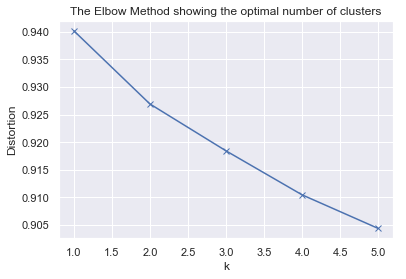

In [43]:
distortion=[]
K=range(1,6)
for k in K:
    kmeansmodel=KMeans(n_clusters=k)
    kmeansmodel.fit(tfidf_df)
    distortion.append(sum(np.min(cdist(tfidf_df, kmeansmodel.cluster_centers_, 'euclidean'), axis=1))/tfidf_df.shape[0])

plt.plot(K, distortion, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title("The Elbow Method showing the optimal number of clusters")

    

# Supervised Learning in Text Classification

In [1]:
# import all necessary libraries
from sklearn.datasets import fetch_20newsgroups
from scipy.cluster.hierarchy import ward, dendrogram, fcluster
from sklearn.metrics.pairwise import cosine_similarity 
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import re
import string
from collections import Counter
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from pylab import *
import warnings
# warning.filterwarnings('ignore')


In [16]:
review=pd.read_json('data_ch3/reviews_Musical_Instruments_5.json', lines=True)
review[['reviewText','overall']].head(10)


,reviewText,overall
0,"Not much to write about here, but it does exac...",5
1,The product does exactly as it should and is q...,5
2,The primary job of this device is to block the...,5
3,Nice windscreen protects my MXL mic and preven...,5
4,This pop filter is great. It looks and perform...,5
5,So good that I bought another one. Love the h...,5
6,"I have used monster cables for years, and with...",5
7,I now use this cable to run from the output of...,3
8,Perfect for my Epiphone Sheraton II. Monster ...,5
9,Monster makes the best cables and a lifetime w...,5


In [17]:
lemmat=WordNetLemmatizer()
review['clean_text']=review['reviewText'].apply(lambda x: ' '.join([lemmat.lemmatize(word.lower())\
                                                                   for word in word_tokenize(re.sub(r'([^\s\w]|_)+', ' ',str(x)))]))

In [19]:
review[['reviewText','clean_text','overall']].head(10)


,reviewText,clean_text,overall
0,"Not much to write about here, but it does exac...",not much to write about here but it doe exactl...,5
1,The product does exactly as it should and is q...,the product doe exactly a it should and is qui...,5
2,The primary job of this device is to block the...,the primary job of this device is to block the...,5
3,Nice windscreen protects my MXL mic and preven...,nice windscreen protects my mxl mic and preven...,5
4,This pop filter is great. It looks and perform...,this pop filter is great it look and performs ...,5
5,So good that I bought another one. Love the h...,so good that i bought another one love the hea...,5
6,"I have used monster cables for years, and with...",i have used monster cable for year and with go...,5
7,I now use this cable to run from the output of...,i now use this cable to run from the output of...,3
8,Perfect for my Epiphone Sheraton II. Monster ...,perfect for my epiphone sheraton ii monster ca...,5
9,Monster makes the best cables and a lifetime w...,monster make the best cable and a lifetime war...,5


In [20]:
tfidf_model=TfidfVectorizer(max_features=500)
tfidf_df=pd.DataFrame(tfidf_model.fit_transform(review['clean_text']).todense())
tfidf_df.columns=sorted(tfidf_model.vocabulary_)
tfidf_df.head()

,10,100,12,20,34,able,about,accurate,acoustic,actually,...,won,work,worked,worth,would,wrong,year,yet,you,your
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.159684,0.0,0.0,0.0,...,0.0,0.134327,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.085436,0.0,0.0,0.000000,0.0,0.0,0.0,0.067074,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.115312,0.0,0.0,0.0,0.079880,0.111989
3,0.0,0.0,0.0,0.0,0.0,0.339573,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.303608,0.000000


In [21]:
review['target']=review['overall'].apply(lambda x: 0 if x<4 else 1)
review['target'].value_counts()

1    9022
0    1239
Name: target, dtype: int64

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


Let's use Logistic regression, Naive Bayes, and KNN

In [61]:
log_model=LogisticRegression()
nb=GaussianNB()
kn=KNeighborsClassifier()

In [94]:
# Create a func used to run all models

def Models(clf):
    clf.fit(tfidf_df, review['target'])
    pred_label=clf.predict(tfidf_df)
    pred_prob=clf.predict_proba(tfidf_df)[:,1]
    review['predict_labels']=pred_label
    
    print( pred_prob,'\n\n', pd.crosstab(review['target'], review['predict_labels']))

In [95]:
# Logistic Regression
Models(log_model)

C:\Users\Raymond\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0.8012897  0.79824545 0.80792477 ... 0.89966816 0.90270901 0.93526225] 

 predict_labels    0     1
target                   
0               163  1076
1                43  8979


In [96]:
# Gaussian Naive Bayes
Models(nb)

[9.99999998e-01 1.53211241e-07 1.97580406e-13 ... 9.96894127e-01
 2.37589249e-08 1.00000000e+00] 

 predict_labels     0     1
target                    
0                982   257
1               2902  6120


In [97]:
# K-Neighbors Classifier
Models(kn)

[1. 1. 1. ... 1. 1. 1.] 

 predict_labels   0     1
target                  
0               63  1176
1               23  8999


# Decision-Tree and Ensemble models

In [18]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import re
import string
from collections import Counter
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from pylab import *
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
lawn=pd.read_json('data_ch3/reviews_Patio_Lawn_and_Garden_5.json', lines=True)


In [9]:
lawn[['reviewText','overall']].head(10)

,reviewText,overall
0,Good USA company that stands behind their prod...,4
1,This is a high quality 8 ply hose. I have had ...,5
2,It's probably one of the best hoses I've ever ...,4
3,I probably should have bought something a bit ...,5
4,I bought three of these 5/8-inch Flexogen hose...,5
5,I aqm impressed with the cost and quality of t...,5
6,After using this hose I will never go back to ...,5
7,This is one tough hose and it is thick and sti...,5
8,I'll buy more of these come Spring. Holding u...,5
9,So far so good! I have not really had the time...,4


In [11]:
lawn['reviewText'].iloc[5]

'I aqm impressed with the cost and quality of this product, Also impressed on the fast shipment by Amazon as I received it in 4 days, Has not kinked and a great hose as I had one before which I left in the yard during all seasons and even ran across driveway, But it lasted 5 good years through all the abuse,  I would recommend this to anyone, Thanks'

In [12]:
lemmat=WordNetLemmatizer()
lawn['clean_text']=lawn['reviewText'].apply(lambda x: ' '.join([lemmat.lemmatize(w.lower())\
                                                               for w in word_tokenize(re.sub(r'([^\s\w]|_)+', ' ',str(x)))]))

In [15]:
lawn[['reviewText','clean_text','overall']].head(10)

,reviewText,clean_text,overall
0,Good USA company that stands behind their prod...,good usa company that stand behind their produ...,4
1,This is a high quality 8 ply hose. I have had ...,this is a high quality 8 ply hose i have had g...,5
2,It's probably one of the best hoses I've ever ...,it s probably one of the best hose i ve ever h...,4
3,I probably should have bought something a bit ...,i probably should have bought something a bit ...,5
4,I bought three of these 5/8-inch Flexogen hose...,i bought three of these 5 8 inch flexogen hose...,5
5,I aqm impressed with the cost and quality of t...,i aqm impressed with the cost and quality of t...,5
6,After using this hose I will never go back to ...,after using this hose i will never go back to ...,5
7,This is one tough hose and it is thick and sti...,this is one tough hose and it is thick and sti...,5
8,I'll buy more of these come Spring. Holding u...,i ll buy more of these come spring holding up ...,5
9,So far so good! I have not really had the time...,so far so good i have not really had the time ...,4


In [22]:
def Tfidf(df):
    tfidf_model=TfidfVectorizer(max_features=500)
    tfidf_df=pd.DataFrame(tfidf_model.fit_transform(df).todense())
    tfidf_df.columns=sorted(tfidf_model.vocabulary_)
    return tfidf_df

In [29]:
tfidf_df=Tfidf(lawn['clean_text'])
tfidf_df.head()

,10,20,34,8217,able,about,actually,add,after,again,...,work,worked,working,worth,would,yard,year,yet,you,your
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.120568,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.161561,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.116566,0.0,0.216988,0.000000,0.049357
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.064347,0.0,0.0,0.070857,0.0,...,0.0,0.0,0.0,0.0,0.0,0.083019,0.0,0.000000,0.000000,0.000000


In [25]:
lawn['target']=lawn['overall'].apply(lambda x: 0 if x<4 else 1)
lawn['target'].value_counts()

1    10421
0     2851
Name: target, dtype: int64

In [34]:
lawn[['reviewText','clean_text','overall','target']].head(10)

,reviewText,clean_text,overall,target
0,Good USA company that stands behind their prod...,good usa company that stand behind their produ...,4,1
1,This is a high quality 8 ply hose. I have had ...,this is a high quality 8 ply hose i have had g...,5,1
2,It's probably one of the best hoses I've ever ...,it s probably one of the best hose i ve ever h...,4,1
3,I probably should have bought something a bit ...,i probably should have bought something a bit ...,5,1
4,I bought three of these 5/8-inch Flexogen hose...,i bought three of these 5 8 inch flexogen hose...,5,1
5,I aqm impressed with the cost and quality of t...,i aqm impressed with the cost and quality of t...,5,1
6,After using this hose I will never go back to ...,after using this hose i will never go back to ...,5,1
7,This is one tough hose and it is thick and sti...,this is one tough hose and it is thick and sti...,5,1
8,I'll buy more of these come Spring. Holding u...,i ll buy more of these come spring holding up ...,5,1
9,So far so good! I have not really had the time...,so far so good i have not really had the time ...,4,1


In [33]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [31]:
dt=DecisionTreeClassifier()
dt.fit(tfidf_df,lawn['target'])
lawn['pred_label']=dt.predict(tfidf_df)

In [32]:
pd.crosstab(lawn['target'],lawn['pred_label'])

pred_label,0,1
target,,
0,2845,6
1,2,10419


It predicted 6627 instances with a target label 0 correctly classified, and 8 such instances wrongly classified. 7036 instances with a target labels of 1 are correctly classified. Only 1 misclassified.

In [35]:
dtr=DecisionTreeRegressor()
dtr.fit(tfidf_df,lawn['overall'])
lawn['pred_label_dtreg']=dtr.predict(tfidf_df)


In [37]:
lawn[['pred_label_dtreg','overall']].head()

,pred_label_dtreg,overall
0,4.0,4
1,5.0,5
2,4.0,4
3,5.0,5
4,5.0,5


In [40]:
# a function for all classifiers
def clf_models(model_type, X_train, y):
    model=model_type.fit(X_train, y)
    pred_label=model.predict(tfidf_df)
    return pred_label

In [42]:
# RandomForest Classifier
rfc=RandomForestClassifier(n_estimators=20, max_depth=4,max_features='sqrt', random_state=1)
lawn['rfc_pred_label']=clf_models(rfc,tfidf_df,lawn['target'])
pd.crosstab(lawn['target'], lawn['rfc_pred_label'])

rfc_pred_label,1
target,
0,2851
1,10421


In [53]:
# XGBoostingClassifier
gxbc=XGBClassifier(n_estimators=20,learning_rate=0.001, max_depth=5,subsample=0.6, colsample_bytree=0.6,reg_alpha=10, seed=42)
lawn['gxb_pred_label']=clf_models(gxbc,tfidf_df,lawn['target'])
pd.crosstab(lawn['target'], lawn['gxb_pred_label'])

gxb_pred_label,0,1
target,,
0,2,2849
1,0,10421


In [51]:
# GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=20, max_depth=3,max_features='sqrt', random_state=1)
lawn['gbc_pred_label']=clf_models(gbc,tfidf_df,lawn['target'])
pd.crosstab(lawn['target'], lawn['gbc_pred_label'])

gbc_pred_label,0,1
target,,
0,9,2842
1,0,10421


# Sampling (Simple Random, Stratified, Multi-Stage)

In [57]:
data=pd.read_excel('data_ch3/Online Retail.xlsx')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [58]:
# Obtain 10% of sample data
sample_data=data.sample(frac=0.1, random_state=42)
sample_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
209268,555200,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2011-06-01 12:05:00,0.85,17315.0,United Kingdom
207108,554974,21128,GOLD FISHING GNOME,4,2011-05-27 17:14:00,6.95,14031.0,United Kingdom
167085,550972,21086,SET/6 RED SPOTTY PAPER CUPS,4,2011-04-21 17:05:00,0.65,14031.0,United Kingdom
471836,576652,22812,PACK 3 BOXES CHRISTMAS PANETTONE,3,2011-11-16 10:39:00,1.95,17198.0,United Kingdom
115865,546157,22180,RETROSPOT LAMP,2,2011-03-10 08:40:00,9.95,13502.0,United Kingdom


In [59]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_valid, y_train, y_valid = train_test_split(data,data['Country'],\
                                                      test_size=0.2, random_state=42,stratify=data['Country'])

In [64]:
data.shape

(541909, 8)

In [65]:
X_train.shape

(433527, 8)

we filter out the data in various stages and extract random samples from it. We extract a random sample of 2% from those transactions by country, which occured in UK, Germany,or France and corresponding qunatity is >=2

In [66]:
data_ugf=data[data['Country'].isin(['United Kingdom','Germany','France'])]
data_ugfQ2=data_ugf[data_ugf['Quantity']>=2]
data_ugfQ2_sample=data_ugfQ2.sample(frac=0.02, random_state=42)

data_ugfQ2_sample.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
224900,556579,22987,WRAP SUMMER ROSE DESIGN,25,2011-06-13 14:16:00,0.42,15069.0,United Kingdom
479100,577137,21137,BLACK RECORD COVER FRAME,96,2011-11-18 08:59:00,3.39,14110.0,United Kingdom
78507,542888,22476,EMPIRE UNION JACK TV DINNER TRAY,3,2011-02-01 13:15:00,4.95,15687.0,United Kingdom
499283,578664,22593,CHRISTMAS GINGHAM STAR,7,2011-11-24 16:59:00,0.85,15910.0,United Kingdom
153888,549831,16156S,WRAP PINK FAIRY CAKES,25,2011-04-12 13:10:00,0.42,14844.0,United Kingdom


# Text Classifier:
A Text Classifier is a machine learning model that is capable of labeling texts based on their contents.

In [7]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import re
import string
from collections import Counter
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from pylab import *
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups

In [14]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Raymond\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Raymond\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [3]:
nltk.download('stopwords')
stop_words=stopwords.words('english')
stop_words=stop_words+list(string.printable)
lemmat=WordNetLemmatizer()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Raymond\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [8]:
top_categ=['misc.forsale','sci.electronics','talk.religion.misc']
news_data=fetch_20newsgroups(subset='train', categories=top_categ, shuffle=True, random_state=42, download_if_missing=True)
news_df=pd.DataFrame({'text': news_data['data'], 'category': news_data.target})

In [9]:
news_df.head()

,text,category
0,From: Steve@Busop.cit.wayne.edu (Steve Teolis)...,0
1,From: jks2x@holmes.acc.Virginia.EDU (Jason K. ...,0
2,From: wayne@uva386.schools.virginia.edu (Tony ...,1
3,From: lihan@ccwf.cc.utexas.edu (Bruce G. Bostw...,1
4,From: myoakam@cis.ohio-state.edu (micah r yoak...,0


In [15]:
news_df['clean_text']=news_df['text'].apply(lambda x: ' '.join(lemmat.lemmatize(word.lower())\
                                                              for word in word_tokenize(re.sub(r'([^\s\w]|_)+', ' ',str(x))) \
                                                              if word.lower() not in stop_words))

In [17]:

tfidf_model=TfidfVectorizer(max_features=20)
tfidf_df=pd.DataFrame(tfidf_model.fit_transform(news_df['clean_text']).todense())
tfidf_df.columns=sorted(tfidf_model.vocabulary_)
tfidf_df.head()

,00,article,com,edu,good,host,know,like,line,new,nntp,one,organization,posting,sale,subject,university,use,would,writes
0,0.719664,0.000000,0.000000,0.191683,0.0,0.124066,0.000000,0.153294,0.066931,0.520927,0.124370,0.0,0.068809,0.120711,0.161624,0.066888,0.255410,0.0,0.00000,0.000000
1,0.000000,0.000000,0.000000,0.219265,0.0,0.000000,0.353598,0.350704,0.153124,0.000000,0.000000,0.0,0.157421,0.000000,0.739523,0.153025,0.292162,0.0,0.00000,0.000000
2,0.000000,0.000000,0.000000,0.853563,0.0,0.000000,0.000000,0.000000,0.298044,0.000000,0.000000,0.0,0.306407,0.000000,0.000000,0.297852,0.000000,0.0,0.00000,0.000000
3,0.000000,0.267175,0.255208,0.567867,0.0,0.245034,0.000000,0.302760,0.132190,0.000000,0.245634,0.0,0.135900,0.238407,0.000000,0.132105,0.252221,0.0,0.28648,0.270283
4,0.000000,0.000000,0.000000,0.411807,0.0,0.266541,0.000000,0.000000,0.143793,0.000000,0.267194,0.0,0.147828,0.259333,0.694459,0.143700,0.274358,0.0,0.00000,0.000000


Calculate the correlation matrix for tf-idf

In [18]:
correlat_matrix=tfidf_df.corr()
correlat_matrix.head()

,00,article,com,edu,good,host,know,like,line,new,nntp,one,organization,posting,sale,subject,university,use,would,writes
00,1.000000,-0.113080,-0.081874,-0.116847,-0.053495,-0.078405,-0.096597,-0.084413,-0.161674,0.026696,-0.084632,-0.076635,-0.208121,-0.083772,0.054777,-0.188759,-0.105828,-0.076621,-0.094492,-0.127518
article,-0.113080,1.000000,0.125853,0.076146,-0.008246,-0.055519,0.025570,-0.000201,-0.158956,-0.121483,-0.046249,0.029978,-0.201204,-0.038486,-0.197164,-0.189810,-0.158022,0.035890,0.015507,0.572650
com,-0.081874,0.125853,1.000000,-0.471456,-0.016128,-0.178742,-0.036333,-0.037284,-0.110011,-0.071355,-0.175256,-0.037293,-0.084630,-0.168613,-0.131051,-0.114145,-0.368688,-0.035631,-0.010214,0.150258
edu,-0.116847,0.076146,-0.471456,1.000000,-0.098067,0.242610,-0.100041,-0.103703,-0.043210,-0.059893,0.247395,-0.119432,0.023394,0.225912,-0.003604,-0.019058,0.371798,-0.126742,-0.152644,0.017169
good,-0.053495,-0.008246,-0.016128,-0.098067,1.000000,-0.098199,0.025899,0.045106,-0.186943,-0.046803,-0.098198,0.074548,-0.166908,-0.089622,-0.115122,-0.176614,-0.101782,0.068633,0.087909,0.056725


In [19]:
import seaborn as sns

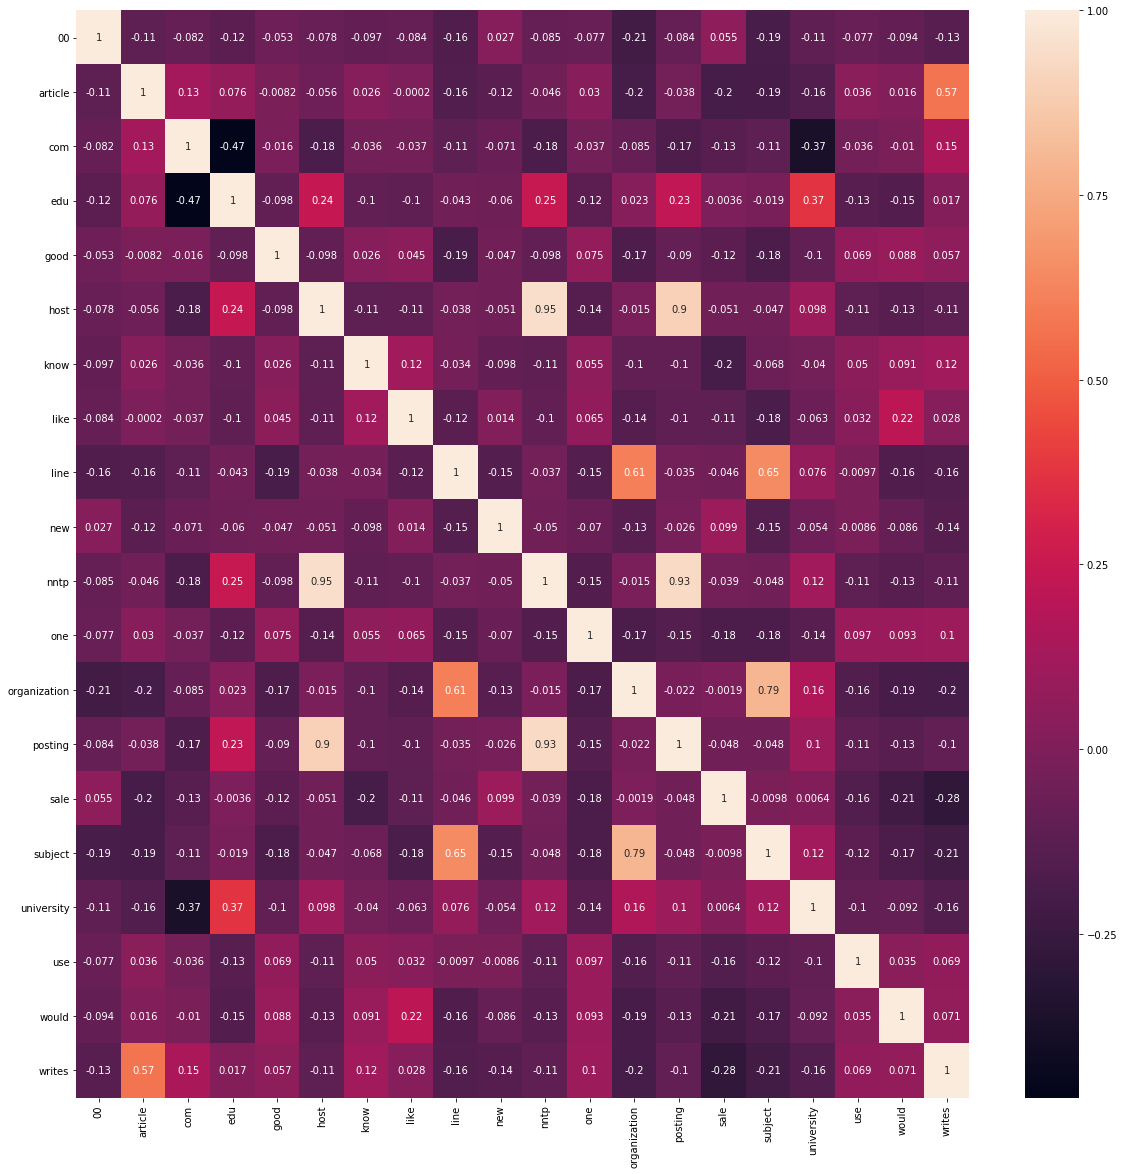

In [20]:
fix,ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlat_matrix, annot=True)

To identify a pair of terms with high correlation, we created a upper triangular matrix from correlation matrix.  We also created a stacked array out of it and traversed it.

In [42]:
correlated_matrix_ut=correlat_matrix.where(np.triu(np.ones(correlat_matrix.shape)).astype(np.bool))
corr_matrix_melted = correlated_matrix_ut.stack().reset_index()
corr_matrix_melted.columns=['word1', 'word2', 'correlation']
corr_matrix_melted[(corr_matrix_melted['word1']!=corr_matrix_melted['word2']) & (corr_matrix_melted['correlation']>.7)]

,word1,word2,correlation
95,host,nntp,0.953828
98,host,posting,0.896666
158,nntp,posting,0.934923
177,organization,subject,0.793946


Remove terms for which the coefficient of correlation is >.7 and created a separate dataframe with the remaining terms. 

In [43]:
tf_idf_no_corrwords=tfidf_df.drop(['nntp','posting','organization'],axis=1)
tf_idf_no_corrwords.head()

,00,article,com,edu,good,host,know,like,line,new,one,sale,subject,university,use,would,writes
0,0.719664,0.000000,0.000000,0.191683,0.0,0.124066,0.000000,0.153294,0.066931,0.520927,0.0,0.161624,0.066888,0.255410,0.0,0.00000,0.000000
1,0.000000,0.000000,0.000000,0.219265,0.0,0.000000,0.353598,0.350704,0.153124,0.000000,0.0,0.739523,0.153025,0.292162,0.0,0.00000,0.000000
2,0.000000,0.000000,0.000000,0.853563,0.0,0.000000,0.000000,0.000000,0.298044,0.000000,0.0,0.000000,0.297852,0.000000,0.0,0.00000,0.000000
3,0.000000,0.267175,0.255208,0.567867,0.0,0.245034,0.000000,0.302760,0.132190,0.000000,0.0,0.000000,0.132105,0.252221,0.0,0.28648,0.270283
4,0.000000,0.000000,0.000000,0.411807,0.0,0.266541,0.000000,0.000000,0.143793,0.000000,0.0,0.694459,0.143700,0.274358,0.0,0.00000,0.000000


## Dimensionality Reduction
There are some optional steps that are followed on a case-to-case basis. For example, if td-idf and BoW representation of text corpus is so big that does not fit into memory, it needs to reduce its dimension in use of PCA

In [44]:
from sklearn.decomposition import PCA

In [45]:
pca=PCA(2)
pca.fit(tfidf_df)
pca_tfidf=pca.transform(tfidf_df)
pca_tfidf

array([[-0.18033489,  0.31729431],
       [-0.20026427,  0.37237324],
       [-0.44492092, -0.02168107],
       ...,
       [-0.01963658,  0.32993887],
       [-0.37960654, -0.17555366],
       [-0.46926297, -0.02581256]])

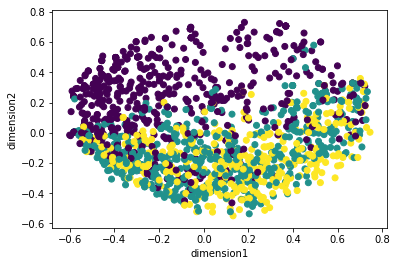

In [48]:
plt.scatter(pca_tfidf[:,0], pca_tfidf[:,1], c=news_df['category'], cmap='viridis')
plt.xlabel("dimension1")
plt.ylabel('dimension2')
plt.show()


## Developing End-to-End Text Classifier
on wikipedia articles. The classifier will classify comments as toxic or or

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, classification_report, accuracy_score,auc
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import re
%matplotlib inline
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [6]:
docu=pd.read_csv("data_ch3/train_comment_small.csv")

In [56]:
docu.head(10)

,comment_text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0
5,"""\n\nCongratulations from me as well, use the ...",0
6,***k***ER BEFORE YOU PISS AROUND ON MY WORK,1
7,Your vandalism to the Matt Shirvington article...,0
8,Sorry if the word 'nonsense' was offensive to ...,0
9,alignment on this subject and which are contra...,0


In [40]:
docu['clean_text'].iloc[15923]

'issue wrt internet rumor given attention rumored internet'

In [58]:
docu.iloc[5]
        

comment_text    "\n\nCongratulations from me as well, use the ...
toxic                                                           0
Name: 5, dtype: object

In [59]:
docu['toxic'].value_counts()

0    144277
1     15294
Name: toxic, dtype: int64

In [39]:
docu[docu['clean_text']=='asshole']

,comment_text,toxic,clean_text,topic
26794,YOU ARE AN ASSHOLE,1,asshole,10
56899,you are an asshole \n\n.,1,asshole,10
134320,you're an asshole,1,asshole,10


In [25]:
# Show all toxic comments: 
docu[docu['toxic']==1]

,comment_text,toxic,clean_text,topic
6,***k***ER BEFORE YOU PISS AROUND ON MY WORK,1,k er piss around work,8
12,Hey... what is it..\n@ | talk .\nWhat is it......,1,hey talk exclusive group wp taliban good destr...,17
16,"Bye! \n\nDon't look, come or think of comming ...",1,bye look come think comming back tosser,8
42,You are carefree or antisemmitian? \n\nArchang...,1,carefree antisemmitian archangel white tiger m...,10
43,"unpleasant YOUR FILTHY MOTHER IN THE ASS, DRY!",1,unpleasant filthy mother as dry,10
44,I'm Sorry \n\nI'm sorry I screwed around with ...,1,sorry sorry screwed around someone talk page b...,18
51,GET unpleasantED UP. GET unpleasantEEED UP. G...,1,get unpleasanted get unpleasanteeed got drink ...,10
55,Stupid peace of waste stop deleting my stuff a...,1,stupid peace waste stop deleting stuff asshole...,10
56,=Tony Sidaway is obviously a fistunpleasantee....,1,tony sidaway obviously fistunpleasantee love a...,10
58,My Band Page's deletion. You thought I was gon...,1,band page deletion thought gone deleting comme...,10


In [82]:
def clf_model(model_type, X_train, y_train, X_test):
    model=model_type.fit(X_train, y_train)
    predicted_labels=model.predict(X_test)
    predict_prob=model.predict_proba(X_test)[:,1]
    return [predicted_labels, predict_prob, model]

In [83]:
def model_eval(actual_val, pred_val, pred_prob):
    print("confusion matrix: ", confusion_matrix(actual_val, pred_val))  # X_test, predict_val
    print("Accuracy score: ", accuracy_score(actual_val, pred_val))
    print("Classification report: ", classification_report(actual_val, pred_val))
    fpr, tpr, threshold=roc_curve(actual_val, pred_prob)
    print("\nArea under ROC curve for validation set: ", auc(fpr,tpr))
    fig, ax=plt.subplots(figsize=(6,6))  
    ax.plot(fpr,tpr,label='Validation set AUC')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    ax.legend(loc='best')
    plt.show()

In [7]:
lemmat=WordNetLemmatizer()
stop_words=stopwords.words('english')

In [8]:
docu['clean_text']=docu['comment_text'].apply(lambda x: ' '.join(lemmat.lemmatize(word.lower())\
                                                               for word in word_tokenize(re.sub(r'([^\s\w]|_)+', ' ',str(x))) \
                                                              if word.lower() not in stop_words))


In [86]:
docu['clean_text'].iloc[6]

'k er piss around work'

In [87]:
tfidf_model=TfidfVectorizer(max_features=500)
tfidf_df=pd.DataFrame(tfidf_model.fit_transform(docu['clean_text']).todense())
tfidf_df.columns=sorted(tfidf_model.vocabulary_)
tfidf_df.head()

,10,100,11,12,20,2005,2006,2007,2008,24,...,wp,write,writing,written,wrong,wrote,www,year,yes,yet
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.537393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
X=tfidf_df
y=docu['toxic']

In [89]:
X.head()

,10,100,11,12,20,2005,2006,2007,2008,24,...,wp,write,writing,written,wrong,wrote,www,year,yes,yet
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.537393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
y.sample(10)

148254    0
115335    0
42875     0
120304    1
132199    0
58581     0
34493     0
125491    0
148628    0
12687     0
Name: toxic, dtype: int64

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

Logistics model

C:\Users\Raymond\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


confusion matrix:  [[28677   179]
 [ 1733  1326]]
Accuracy score:  0.9400908663637788
Classification report:                precision    recall  f1-score   support

           0       0.94      0.99      0.97     28856
           1       0.88      0.43      0.58      3059

   micro avg       0.94      0.94      0.94     31915
   macro avg       0.91      0.71      0.77     31915
weighted avg       0.94      0.94      0.93     31915


Area under ROC curve for validation set:  0.9051968877395329


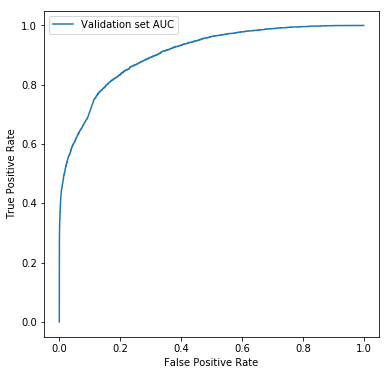

In [92]:
logreg = LogisticRegression()
results = clf_model(logreg, X_train, y_train, X_test)
model_eval(y_test, results[0], results[1])


Random Forest model

confusion matrix:  [[28856     0]
 [ 2990    69]]
Accuracy score:  0.9063136456211812
Classification report:                precision    recall  f1-score   support

           0       0.91      1.00      0.95     28856
           1       1.00      0.02      0.04      3059

   micro avg       0.91      0.91      0.91     31915
   macro avg       0.95      0.51      0.50     31915
weighted avg       0.92      0.91      0.86     31915


Area under ROC curve for validation set:  0.8531297215658813


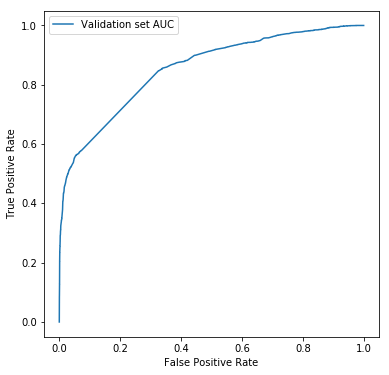

In [93]:
rfc = RandomForestClassifier(n_estimators=20,max_depth=4,max_features='sqrt',random_state=1)
results = clf_model(rfc, X_train, y_train, X_test)
model_eval(y_test, results[0], results[1])
model_rfc = results[2]

In [95]:
# Display important words with random forest model
word_importance=pd.DataFrame({'word': X_train.columns, 'importance': model_rfc.feature_importances_})
word_importance.sort_values("importance", ascending=False).head()

,word,importance
455,unpleasant,0.190242
49,awful,0.179852
42,as,0.160197
280,nightmare,0.047444
413,stupid,0.047368


confusion matrix:  [[28757    99]
 [ 1987  1072]]
Accuracy score:  0.9346388845370516
Classification report:                precision    recall  f1-score   support

           0       0.94      1.00      0.96     28856
           1       0.92      0.35      0.51      3059

   micro avg       0.93      0.93      0.93     31915
   macro avg       0.93      0.67      0.74     31915
weighted avg       0.93      0.93      0.92     31915


Area under ROC curve for validation set:  0.7735450847771302


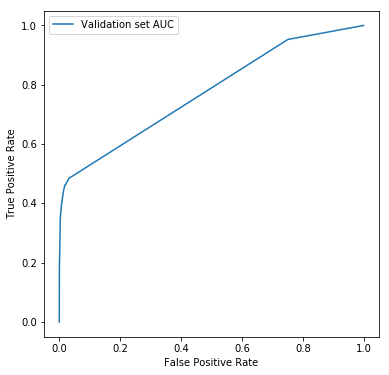

In [97]:
# Use XGBoost
xgb=XGBClassifier(n_estimators=20, learning_rate=0.03,max_depth=5, subsample=0.6, reg_alpha=10, colsample_bytree=0.6, seed=42)
results = clf_model(xgb, X_train, y_train, X_test)
model_eval(y_test, results[0], results[1])
model_xgb = results[2]

In [98]:
# Display important words with random forest model
word_importance=pd.DataFrame({'word': X_train.columns, 'importance': model_xgb.feature_importances_})
word_importance.sort_values("importance", ascending=False).head()

,word,importance
455,unpleasant,0.283890
49,awful,0.152075
413,stupid,0.097530
469,waste,0.080456
280,nightmare,0.069049


# building pipelines for NLP projects

In [114]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.tree import DecisionTreeClassifier


In [115]:
top_categ=['misc.forsale','sci.electronics','talk.religion.misc']
news=fetch_20newsgroups(subset='train', categories=top_categ, shuffle=True, random_state=42, download_if_missing=True)


In [116]:
pipelines=Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer())])

In [117]:
# pipelines.fit(news.data, news.target)
pd.DataFrame(pipelines.fit_transform(news.data, news.target).todense()).head()

,0,1,2,3,4,5,6,7,8,9,...,26016,26017,26018,26019,26020,26021,26022,26023,26024,26025
0,0.165523,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.081279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Save and load model

In [119]:
import pickle
from joblib import dump, load
from sklearn.feature_extraction.text import TfidfVectorizer

In [120]:
corpus = [
'Data Science is an overlap between Arts and Science',
'Generally, Arts graduates are right-brained and Science graduates are left-brained',
'Excelling in both Arts and Science at a time becomes difficult',
'Natural Language Processing is a part of Data Science'
]
tfidf_model = TfidfVectorizer()
print(tfidf_model.fit_transform(corpus).todense())

[[0.40332811 0.25743911 0.         0.25743911 0.         0.
  0.40332811 0.         0.         0.31798852 0.         0.
  0.         0.         0.         0.31798852 0.         0.
  0.         0.         0.40332811 0.         0.         0.
  0.42094668 0.        ]
 [0.         0.159139   0.49864399 0.159139   0.         0.
  0.         0.         0.49864399 0.         0.         0.
  0.24932199 0.49864399 0.         0.         0.         0.24932199
  0.         0.         0.         0.         0.         0.24932199
  0.13010656 0.        ]
 [0.         0.22444946 0.         0.22444946 0.35164346 0.35164346
  0.         0.35164346 0.         0.         0.35164346 0.35164346
  0.         0.         0.35164346 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.18350214 0.35164346]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.30887228 0.         0.
  0.         0.         0.         0.30887228 0.39176

In [122]:
# save model on disk using joblib
dump(tfidf_model,'tfidf_model.joblib')

['tfidf_model.joblib']

In [126]:
tfidf_load=load('tfidf_model.joblib')
print(tfidf_load.fit_transform(corpus).todense())

[[0.40332811 0.25743911 0.         0.25743911 0.         0.
  0.40332811 0.         0.         0.31798852 0.         0.
  0.         0.         0.         0.31798852 0.         0.
  0.         0.         0.40332811 0.         0.         0.
  0.42094668 0.        ]
 [0.         0.159139   0.49864399 0.159139   0.         0.
  0.         0.         0.49864399 0.         0.         0.
  0.24932199 0.49864399 0.         0.         0.         0.24932199
  0.         0.         0.         0.         0.         0.24932199
  0.13010656 0.        ]
 [0.         0.22444946 0.         0.22444946 0.35164346 0.35164346
  0.         0.35164346 0.         0.         0.35164346 0.35164346
  0.         0.         0.35164346 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.18350214 0.35164346]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.30887228 0.         0.
  0.         0.         0.         0.30887228 0.39176

# Topic Modeling

In [10]:
tfidf_model=TfidfVectorizer(max_df=0.95, min_df=2)
dtm=tfidf_model.fit_transform(docu['clean_text'])
dtm

<159571x68023 sparse matrix of type '<class 'numpy.float64'>'
	with 4291752 stored elements in Compressed Sparse Row format>

# None-negative Matrix Factorization

In [11]:
from sklearn.decomposition import NMF

In [12]:
nmf=NMF(n_components=20, random_state=42)
nmf.fit(dtm)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=20, random_state=42, shuffle=False, solver='cd', tol=0.0001,
  verbose=0)

In [13]:
# Show Top 15 words topics
for index, topic in enumerate(nmf.components_):
    print(f'The Top 15 words topic #{index}')
    print([tfidf_model.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

The Top 15 words topic #0
['wp', 'create', 'creation', 'review', 'notable', 'featured', 'discussion', 'need', 'improve', 'subject', 'created', 'information', 'reference', 'section', 'article']


The Top 15 words topic #1
['pillar', 'tutorial', 'four', 'date', 'hello', 'sign', 'tilde', 'style', 'name', 'place', 'ask', 'hope', 'help', 'question', 'welcome']


The Top 15 words topic #2
['contest', 'indicate', 'notability', 'notable', 'placed', 'note', 'please', 'guideline', 'subject', 'may', 'criterion', 'deleted', 'tag', 'speedy', 'deletion']


The Top 15 words topic #3
['avoid', 'warning', 'creating', 'irrelevant', 'address', 'shared', 'account', 'ip', 'disruptive', 'stop', 'please', 'vandalize', 'continue', 'editing', 'blocked']


The Top 15 words topic #4
['see', 'description', 'free', 'deleted', 'tag', 'listed', 'rationale', 'uploaded', 'medium', 'file', 'jpg', 'fair', 'use', 'copyright', 'image']


The Top 15 words topic #5
['preceding', 'added', 'list', 'review', 'message', 'talkba

In [15]:
docu['clean_text'].head()

0    explanation edits made username hardcore metal...
1    aww match background colour seemingly stuck th...
2    hey man really trying edit war guy constantly ...
3    make real suggestion improvement wondered sect...
4                        sir hero chance remember page
Name: clean_text, dtype: object

In [17]:
topic_result=nmf.transform(dtm)
topic_result.argmax(axis=1)
docu['topic']=topic_result.argmax(axis=1)
docu[['clean_text','topic']].head(10)

,clean_text,topic
0,explanation edits made username hardcore metal...,13
1,aww match background colour seemingly stuck th...,16
2,hey man really trying edit war guy constantly ...,15
3,make real suggestion improvement wondered sect...,18
4,sir hero chance remember page,12
5,congratulation well use tool well talk,5
6,k er piss around work,8
7,vandalism matt shirvington article reverted pl...,13
8,sorry word nonsense offensive anyway intending...,13
9,alignment subject contrary dulithgow,2
